In [1]:
import pandas as pd
import numpy as np
import os
import re
import plotly.express as px
import plotly.graph_objects as go

In [2]:
adaptive_folder='C:/Users/jimmy/OneDrive/Desktop/Maestria Metodos Matematicos y Aplicaciones/Tesis/adaptive'

In [44]:
def get_data_sign(sign):
    all_data=pd.DataFrame({'kappa':[],'nu':[]})
    for file in os.listdir(f'{adaptive_folder}/data'):
        if re.search(f"^data_Ci_equal_(.*?)Cs_Cz_equal_Cs\(1_{sign}_(.*?)\).csv", file):
            kappa=file.split('_')[3].replace('Cs','')
            nu=float(file.split('_')[8].replace(').csv',''))
            dat=pd.read_csv(f'{adaptive_folder}/data/bifurcation_data/{file}')
            
            if sign=='plus':
                sgn='+'
            else:
                sgn='-'
            
            try:
                dat_graph=dat[dat['R0']>0.2]
                dat_graph=dat_graph[dat_graph['R0']<2]
                fig = px.scatter(dat_graph, x="R0", y="i_opt")
                fig.update_traces(marker=dict(size=7, line=dict(width=0.1, color='Black')))
                fig.update_layout(paper_bgcolor='#DDE1E2',plot_bgcolor='#FFFFFF',height=500, width=600, title=f'C^i={kappa}C^s, C^z=C^s(1{sgn}{nu})')
                fig.write_image(f'{adaptive_folder}/images/simulations/fig_{sign}_kappa_{kappa}_nu_{nu}.png',engine='kaleido')
            except Exception as e:
                print(e)
            
            if dat.shape[0]>0:
                dat['nu']=[nu]*dat.shape[0]
                dat['kappa']=[kappa]*dat.shape[0]
            all_data = all_data.append(dat,ignore_index=True)
    return all_data

In [45]:
_=get_data_sign(sign='plus')
_=get_data_sign(sign='minus')

In [14]:
def get_figs_sign(sign):
    all_data=get_data_sign(sign)
    figs=[]
    vals=[v/10 for v in range(1,11)]
    for val in vals:
        df_graph=all_data[all_data['nu']==val]
        df_graph=df_graph[df_graph['R0']>0.2] ### Weird numeric cases
        fig = px.scatter(df_graph, x="R0", y="i_opt",
                         color="kappa",
                         color_discrete_map={
                        "0.1": "#8BCCE7",
                        "0.2": "#62C3EB",
                        "0.3": "#36BBF2",
                        "0.4": "#14A6E3",
                        "0.5": "#1499D1",
                        "0.6": "#0F8DC2",
                        "0.7": "#0D7BA9",
                        "0.8": "#0B688F",
                        "0.9": "#095677",
                        "1.0": "#064966"})
        if sign=='plus':
            sgn='+'
        else:
            sgn='-'
        fig.update_layout(height=500,width=500,title=f"C^i=kappaC^s, C^z=C^s(1{sgn}{val})")
        fig.write_image(f"fig_{sign}_{val}.png",engine='kaleido')
        figs.append(fig)       
    return figs

In [15]:
figs_p=get_figs_sign(sign='plus')
figs_m=get_figs_sign(sign='minus')

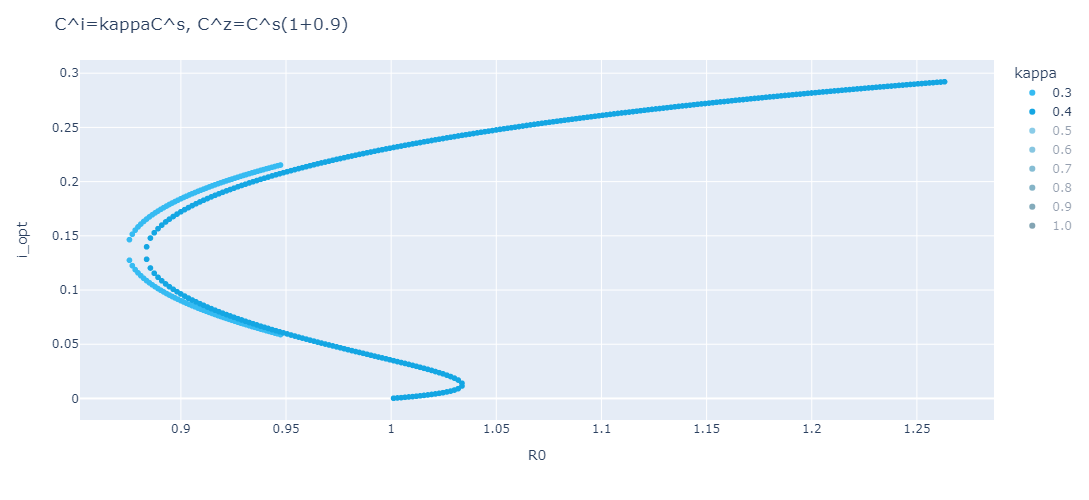

In [25]:
figs_p[8]

In [5]:
df=pd.read_csv(f"{adaptive_folder}/data/data_Ci_equal_0.8Cs_Cz_equal_Cs(1_plus_0.9).csv")
df

,R0,i_opt
0,0.918164,0.112641
1,0.918164,0.134065
2,0.921778,0.103068
3,0.921778,0.143744
4,0.925392,0.096787
...,...,...
486,2.511860,0.362663
487,2.515474,0.362771
488,2.519088,0.362879
489,2.522702,0.362987


3

In [12]:
def get_number_sols(sign):
    all_data=pd.DataFrame({})
    for file in os.listdir(f'{adaptive_folder}/data'):
        if re.search(f"^data_Ci_equal_(.*?)Cs_Cz_equal_Cs\(1_{sign}_(.*?)\).csv", file):
            kappa=file.split('_')[3].replace('Cs','')
            nu=float(file.split('_')[8].replace(').csv',''))
            dat=pd.read_csv(f'{adaptive_folder}/data/{file}')
            try:
                num_max_eq_pts=max(dat['R0'].value_counts().tolist())
            except:
                num_max_eq_pts=0

            if sign=='plus':
                czcs=1+nu
            else:
                czcs=1-nu
                
            new_dat=pd.DataFrame({
                'C^z/C^s':[czcs],
                'C^i/C^s':[kappa],
                'num_max_eq_pts':[num_max_eq_pts]
            })
            all_data = all_data.append(new_dat,ignore_index=True)
    return all_data

In [50]:
grid_data=get_number_sols(sign='minus')
grid_data=grid_data.append(get_number_sols(sign='plus'))
grid_data

,C^z/C^s,C^i/C^s,num_max_eq_pts
0,0.9,0.1,0
1,0.8,0.1,1
2,0.7,0.1,1
3,0.6,0.1,1
4,0.5,0.1,1
...,...,...,...
95,1.6,1.0,3
96,1.7,1.0,3
97,1.8,1.0,3
98,1.9,1.0,3


In [51]:
grid_data['num_max_eq_pts'].value_counts()

2    140
3     35
0     20
1      5
Name: num_max_eq_pts, dtype: int64

In [62]:
grid_data['C^z/C^s'].value_counts()

0.9    10
0.8    10
1.9    10
1.8    10
1.7    10
1.6    10
1.5    10
1.4    10
1.3    10
1.2    10
1.1    10
0.0    10
0.1    10
0.2    10
0.3    10
0.4    10
0.5    10
0.6    10
0.7    10
2.0    10
Name: C^z/C^s, dtype: int64

In [53]:
grid_data['C^i/C^s'].value_counts()

0.1    20
0.2    20
0.3    20
0.4    20
0.5    20
0.6    20
0.7    20
0.8    20
0.9    20
1.0    20
Name: C^i/C^s, dtype: int64

In [76]:
czcss=grid_data['C^z/C^s'].unique().tolist()
czcss.sort()
n=len(czcss)

cicss=grid_data['C^i/C^s'].unique().tolist()
cicss.sort()
m=len(cicss)

print(m,n)

10 20


In [113]:
arr = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        try:
            grid_data_coord=grid_data[ (grid_data['C^z/C^s']==czcss[i]) & (grid_data['C^i/C^s']==cicss[j])]
            arr[i,j]=grid_data_coord['num_max_eq_pts'].tolist()[0]
        except Exception as e:
            print(e)
            continue

In [ ]:
fig = go.Figure()
fig.add_trace(go.Contour(
    z=arr,
    colorscale="Agsunset",
    colorbar=dict(
        title="Bifurcation",
        titleside="top",
        tickmode="array",
        tickvals=[1, 2, 2.5],
        ticktext=["Nothing", "Cuadratic", "Cubic"],
        ticks="outside"
    ),
    x=cicss, # horizontal axis
    y=czcss, # vertical axis
    contours_coloring='heatmap'
))
fig.update_layout(width=500,
                  height=500,
                  title="Regions for Bifurcation Behavior",
                  xaxis_title="C^i/C^s",
                  yaxis_title="C^z/C^s"
                 )
fig.show()

In [8]:
values_done=[]
for file in os.listdir(f"{adaptive_folder}/data/bifurcation_heatmap"):
    if file.endswith('csv'):
        try:
            kappa = float(file.split('_')[1])
            xi = float(file.split('_')[2].replace('.csv',''))
            values_done.append((kappa,xi))
        except:
            pass
len(values_done)

308